In [20]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-27, # Fermi level (J)
2.74, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
);
T = 300;

In [21]:
F = vcat([[1, 2, 3, 5, 7, 9] * 10^i for i in 5:5]...);

res = (f -> Conduction.overallDiffusion(semiconductor, T, -f, 15)).(F);

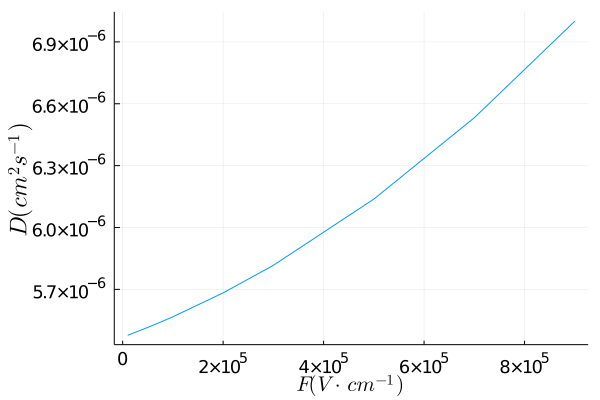

In [22]:
plot(F, res, xlabel=L"F (V \cdot cm^{-1})", ylabel=L"D(cm^2 s^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [23]:
res_mobi = (f -> Conduction.overallMobility(semiconductor, T, -f, 15)).(F);

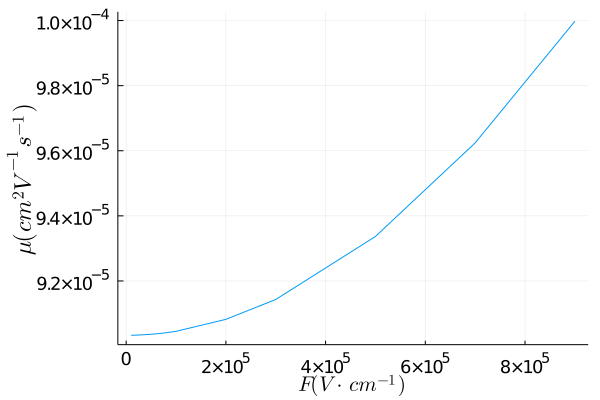

In [24]:
plot(F, res_mobi, xlabel=L"F (V \cdot cm^{-1})", ylabel=L"\mu(cm^2 V^{-1}s^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)


In [25]:
res_ein = (f -> Conduction.overallEin(semiconductor, T, -f, 15)).(F);

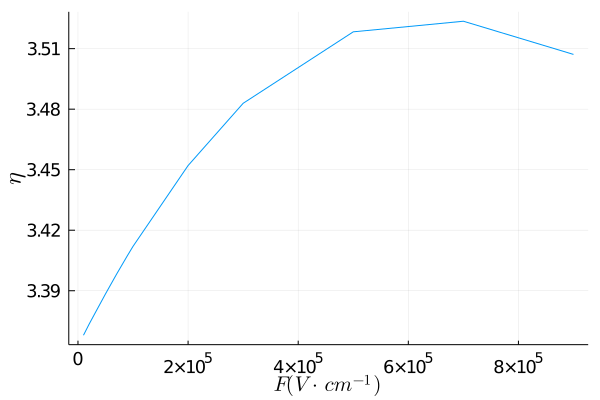

In [27]:
plot(F, res_ein ./ (Conduction.k * T / Conduction.q), xlabel=L"F (V \cdot cm^{-1})", ylabel=L"\eta", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)